In [315]:
%load_ext autoreload
%autoreload 2

import pyreadstat as prs

raw_df, meta = prs.read_sas7bdat("../dat/GSS_sas/gss7222_r3.sas7bdat")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [337]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../src')

from transform_df_to_our_standard import transform_dataframe, make_variable_summary, make_vote_supernodes
from corr_networks import corr_mat_to_partial_corr_mat, cov_mat_to_regularized_partial_corr
from triads import count_triads
from belief_changes import make_degree_strength_change_dfs, make_degree_strength_change_heatmap_figure

In [327]:
df = transform_dataframe(raw_df)

c:\Users\vicvi\BeliefNetworkEvo\nbk\../src\transform_df_to_our_standard.py:474: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_df['PRES92_DONT_KNOW'] = df['PRES92'].map(DONT_KNOW_map)
c:\Users\vicvi\BeliefNetworkEvo\nbk\../src\transform_df_to_our_standard.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_df['PRES92_DEMREP'] = df['PRES92'].map(DEMREP_map)
c:\Users\vicvi\BeliefNetworkEvo\nbk\../src\transform_df_to_our_standard.py:476: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

In [323]:
vars_to_use = ["YEAR", "PARTYID","POLVIEWS","NATSPAC","NATENVIR","NATHEAL","NATCITY","NATCRIME","NATDRUG","NATEDUC","NATRACE","NATARMS",
"NATAID","NATFARE","NATROAD","NATSOC","NATMASS","NATPARK","NATCHLD","NATSCI","NATENRGY","EQWLTH","SPKATH","COLATH","LIBATH","SPKRAC","COLRAC","LIBRAC","SPKCOM","COLCOM","LIBCOM","SPKMIL","COLMIL","LIBMIL","SPKHOMO",
"COLHOMO","LIBHOMO","SPKMSLM","COLMSLM","LIBMSLM","CAPPUN","GUNLAW","COURTS","GRASS","ATTEND","RELITEN","POSTLIFE","PRAYER","AFFRMACT","WRKWAYUP","HELPFUL",
"FAIR","TRUST","CONFINAN","CONBUS","CONCLERG","CONEDUC","CONFED","CONLABOR","CONPRESS","CONMEDIC","CONTV","CONJUDGE","CONSCI","CONLEGIS","CONARMY","GETAHEAD","FEPOL","ABDEFECT","ABNOMORE","ABHLTH","ABPOOR","ABRAPE","ABSINGLE","ABANY","SEXEDUC","DIVLAW","PREMARSX","TEENSEX","XMARSEX","HOMOSEX","PORNLAW",
"SPANKING","LETDIE1","SUICIDE1","SUICIDE2","POLHITOK","POLABUSE","POLMURDR","POLESCAP","POLATTAK","NEWS","TVHOURS","FECHLD","FEPRESCH","FEFAM","RACDIF1","RACDIF2","RACDIF3",
"RACDIF4","HELPPOOR","MARHOMO", "RACOPEN", "HELPNOT", "HELPBLK","PRESLAST_NONCONFORM", "PRESLAST_DEMREP", "VOTELAST"]

vars_post = ["YEAR","PARTYID","POLVIEWS","NATSPAC","NATENVIR","NATHEAL","NATCITY","NATCRIME","NATDRUG","NATEDUC","NATRACE","NATARMS",
"NATAID","NATFARE","NATROAD","NATSOC","NATMASS","NATPARK","NATCHLD","NATSCI","NATENRGY","EQWLTH","SPKATH","COLATH","LIBATH","SPKRAC","COLRAC","LIBRAC","SPKCOM","COLCOM","LIBCOM","SPKMIL","COLMIL","LIBMIL","SPKHOMO",
"COLHOMO","LIBHOMO","SPKMSLM","COLMSLM","LIBMSLM","CAPPUN","GUNLAW","COURTS","GRASS","ATTEND","RELITEN","POSTLIFE","PRAYER","AFFRMACT","WRKWAYUP","HELPFUL",
"FAIR","TRUST","CONFINAN","CONBUS","CONCLERG","CONEDUC","CONFED","CONLABOR","CONPRESS","CONMEDIC","CONTV","CONJUDGE","CONSCI","CONLEGIS","CONARMY","GETAHEAD","FEPOL","ABDEFECT","ABNOMORE","ABHLTH","ABPOOR","ABRAPE","ABSINGLE","ABANY","SEXEDUC","DIVLAW","PREMARSX","TEENSEX","XMARSEX","HOMOSEX","PORNLAW",
"SPANKING","LETDIE1","SUICIDE1","SUICIDE2","POLHITOK","POLABUSE","POLMURDR","POLESCAP","POLATTAK","NEWS","TVHOURS","FECHLD","FEPRESCH","FEFAM","RACDIF1","RACDIF2","RACDIF3",
"RACDIF4","HELPPOOR","MARHOMO", "RACOPEN", "HELPNOT", "HELPBLK","PRESLAST_NONCONFORM", "PRESLAST_DEMREP", "VOTELAST"]


PRES_variables = [
    'VOTE68', 'VOTE72', 'VOTE76', 'VOTE80', 'VOTE84', 'VOTE88', 'VOTE92', 'VOTE96', 'VOTE00', 'VOTE04', 'VOTE08', 'VOTE12', 'VOTE16', 'VOTE20',
    'VOTE68_ELIGIBLE', 'VOTE72_ELIGIBLE', 'VOTE76_ELIGIBLE', 'VOTE80_ELIGIBLE', 'VOTE84_ELIGIBLE', 'VOTE88_ELIGIBLE', 'VOTE92_ELIGIBLE', 'VOTE96_ELIGIBLE', 'VOTE00_ELIGIBLE', 'VOTE04_ELIGIBLE', 'VOTE08_ELIGIBLE', 'VOTE12_ELIGIBLE', 'VOTE16_ELIGIBLE', 'VOTE20_ELIGIBLE',
    'PRES68_HUMPHREY', 'PRES68_NIXON', 'PRES68_WALLACE', 'PRES68_OTHER', 'PRES68_REFUSED', 'PRES68_NONCONFORM', 'PRES68_DEMREP',
    'PRES72_MCGOVERN', 'PRES72_NIXON', 'PRES72_OTHER', 'PRES72_REFUSED', 'PRES72_WOULDNT_VOTE', 'PRES72_DONT_KNOW', 'PRES72_NONCONFORM', 'PRES72_DEMREP',
    'PRES76_CARTER', 'PRES76_FORD', 'PRES76_OTHER', 'PRES76_REFUSED', 'PRES76_NO_PRES_VOTE', 'PRES76_DONT_KNOW', 'PRES76_NONCONFORM', 'PRES76_DEMREP',
    'PRES80_CARTER', 'PRES80_REAGAN', 'PRES80_ANDERSON', 'PRES80_OTHER', 'PRES80_REFUSED', 'PRES80_DIDNT_VOTE', 'PRES80_DONT_KNOW', 'PRES80_NONCONFORM', 'PRES80_DEMREP',
    'PRES84_MONDALE', 'PRES84_REAGAN', 'PRES84_OTHER', 'PRES84_REFUSED', 'PRES84_NO_PRES_VOTE', 'PRES84_DONT_KNOW', 'PRES84_NONCONFORM', 'PRES84_DEMREP',
    'PRES88_BUSH', 'PRES88_DUKAKIS', 'PRES88_OTHER', 'PRES88_REFUSED', 'PRES88_NO_PRES_VOTE', 'PRES88_DONT_KNOW', 'PRES88_NONCONFORM', 'PRES88_DEMREP',
    'PRES92_CLINTON', 'PRES92_BUSH', 'PRES92_PEROT', 'PRES92_OTHER', 'PRES92_NO_PRES_VOTE', 'PRES92_DONT_KNOW', 'PRES92_NONCONFORM', 'PRES92_DEMREP',
    'PRES96_CLINTON', 'PRES96_DOLE', 'PRES96_PEROT', 'PRES96_OTHER', 'PRES96_DIDNT_VOTE', 'PRES96_DONT_KNOW', 'PRES96_NONCONFORM', 'PRES96_DEMREP',
    'PRES00_GORE', 'PRES00_BUSH', 'PRES00_NADER', 'PRES00_OTHER', 'PRES00_DIDNT_VOTE', 'PRES00_DONT_KNOW', 'PRES00_NONCONFORM', 'PRES00_DEMREP',
    'PRES04_KERRY', 'PRES04_BUSH', 'PRES04_NADER', 'PRES04_NO_PRES_VOTE', 'PRES04_DONT_KNOW', 'PRES04_NONCONFORM', 'PRES04_DEMREP',
    'PRES08_OBAMA', 'PRES08_MCCAIN', 'PRES08_OTHER', 'PRES08_DIDNT_VOTE', 'PRES08_DONT_KNOW', 'PRES08_NONCONFORM', 'PRES08_DEMREP',
    'PRES12_OBAMA', 'PRES12_ROMNEY', 'PRES12_OTHER', 'PRES12_DIDNT_VOTE', 'PRES12_DONT_KNOW', 'PRES12_NONCONFORM', 'PRES12_DEMREP',
    'PRES16_CLINTON', 'PRES16_TRUMP', 'PRES16_OTHER', 'PRES16_DIDNT_VOTE', 'PRES16_DONT_KNOW', 'PRES16_NONCONFORM', 'PRES16_DEMREP',
    'PRES20_BIDEN', 'PRES20_TRUMP', 'PRES20_OTHER', 'PRES20_DIDNT_VOTE', 'PRES20_DONT_KNOW', 'PRES20_NONCONFORM', 'PRES20_DEMREP',
    'IF68WHO_HUMPHREY', 'IF68WHO_NIXON', 'IF68WHO_WALLACE', 'IF68WHO_OTHER', 'IF68WHO_WLDNT_VT_RELIG', 'IF68WHO_DONT_KNOW',
    'IF72WHO_MCGOVERN', 'IF72WHO_NIXON', 'IF72WHO_OTHER', 'IF72WHO_REFUSED', 'IF72WHO_WOULDNT_VOTE', 'IF72WHO_WLDNT_VT_RELIG', 'IF72WHO_DONT_KNOW',
    'IF76WHO_CARTER', 'IF76WHO_FORD', 'IF76WHO_OTHER', 'IF76WHO_REFUSED', 'IF76WHO_WOULDNT_VOTE', 'IF76WHO_DONT_KNOW',
    'IF80WHO_CARTER', 'IF80WHO_REAGAN', 'IF80WHO_ANDERSON', 'IF80WHO_OTHER', 'IF80WHO_WOULDNT_VOTE', 'IF80WHO_REFUSED', 'IF80WHO_DONT_KNOW',
    'IF84WHO_MONDALE', 'IF84WHO_REAGAN', 'IF84WHO_OTHER', 'IF84WHO_WOULDNT_VOTE', 'IF84WHO_DONT_KNOW',
    'IF88WHO_DUKAKIS', 'IF88WHO_BUSH', 'IF88WHO_OTHER', 'IF88WHO_DONT_KNOW',
    'IF92WHO_CLINTON', 'IF92WHO_BUSH', 'IF92WHO_PEROT', 'IF92WHO_OTHER', 'IF92WHO_DONT_KNOW',
    'IF96WHO_CLINTON', 'IF96WHO_DOLE', 'IF96WHO_PEROT', 'IF96WHO_OTHER', 'IF96WHO_DONT_KNOW',
    'IF00WHO_GORE', 'IF00WHO_BUSH', 'IF00WHO_NADER', 'IF00WHO_OTHER', 'IF00WHO_DONT_KNOW',
    'IF04WHO_KERRY', 'IF04WHO_BUSH', 'IF04WHO_NADER', 'IF04WHO_DONT_KNOW',
    'IF08WHO_OBAMA', 'IF08WHO_MCCAIN', 'IF08WHO_OTHER', 'IF08WHO_DONT_KNOW',
    'IF12WHO_OBAMA', 'IF12WHO_ROMNEY', 'IF12WHO_OTHER', 'IF12WHO_DONT_KNOW',
    'IF16WHO_CLINTON', 'IF16WHO_TRUMP', 'IF16WHO_OTHER', 'IF16WHO_CANT_REMEMBER', 'IF16WHO_DONT_KNOW',
    'IF20WHO_BIDEN', 'IF20WHO_TRUMP', 'IF20WHO_OTHER', 'IF20WHO_CANT_REMEMBER', 'IF20WHO_DONT_KNOW'
]


# BROKEN_VARS = ["RELIG",'RACOPEN', 'HELPNOT', 'HELPBLK']
# Ommited from this list: "YEAR", "BALLOT", and "LETDIE1" (this one sucks!)


In [372]:
# makes dataframes for use in making the heatmap and the scatterplot
strength_df, degree_df, change_df = make_degree_strength_change_dfs(df, vars_to_use, every_x_years=2)

YEAR                   2018.0
PARTYID                   3.0
POLVIEWS                  3.0
NATSPAC                   1.0
NATENVIR                  1.0
                        ...  
HELPBLK                   2.0
PRESLAST_NONCONFORM       1.0
PRESLAST_DEMREP           1.0
VOTELAST                  1.0
SLOT                   1009.0
Length: 109, dtype: float64


1.9530867187514307
33.0


C:\Users\vicvi\AppData\Local\Temp\ipykernel_20056\1281076466.py:30: RuntimeWarning: invalid value encountered in divide
  means = value_sum / value_count


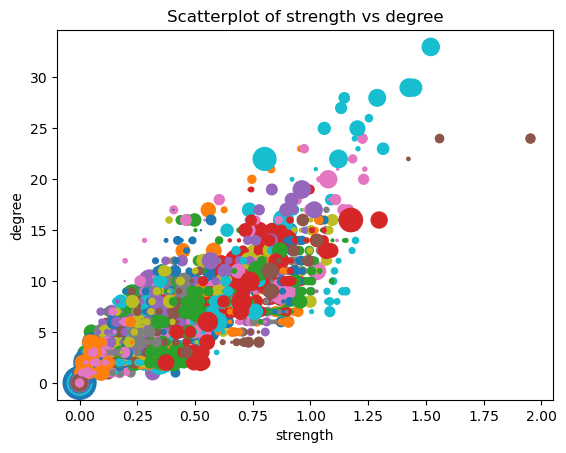

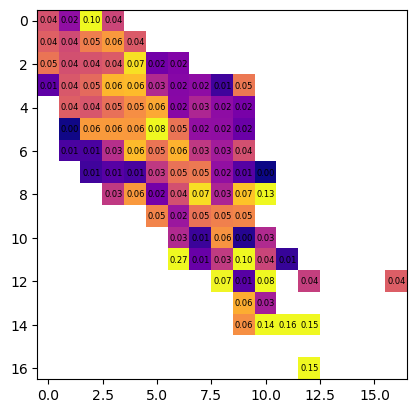

In [ ]:
# this cell plots the scatterplot where the size of the dot is the magnitude of the change
# it also plots the heatmap where the color of the cell is the average change in that particular region

# can change the degree bin and strength bin size here
degree_bin_size = 2
strength_bin_size = 0.12

scatter_fig, scatter_ax = plt.subplots()  # Create a new figure for each column pair
scatter_ax.set_title(f"Scatterplot of strength vs degree")
scatter_ax.set_xlabel(f"strength")
scatter_ax.set_ylabel(f"degree")

strength_ax = strength_df.max().max()
degree_ax = degree_df.max().max()
print(strength_ax)
print(degree_ax)

value_count = np.zeros((np.floor(degree_ax / degree_bin_size).astype(int) + 1, np.floor(strength_ax / strength_bin_size).astype(int) + 1))
value_sum = np.zeros((np.floor(degree_ax / degree_bin_size).astype(int) + 1, np.floor(strength_ax / strength_bin_size).astype(int) + 1))

for col in strength_df.columns:
    diffs = np.abs(np.array(change_df[col]))
    incs = np.where(~np.isnan(diffs), 1, 0)
    vals = np.where(~np.isnan(diffs), diffs, 0)

    np.add.at(value_count, (np.floor(np.array(degree_df[col] / degree_bin_size)).astype(int), np.floor(np.array(strength_df[col]) / strength_bin_size).astype(int)), incs)
    
    np.add.at(value_sum, (np.floor(np.array(degree_df[col] / degree_bin_size)).astype(int), np.floor(np.array(strength_df[col]) / strength_bin_size).astype(int)), 
                            vals)
    
    scatter_ax.scatter(strength_df[col], degree_df[col], s=change_df[col].abs() * 1000)
    # plt.scatter(trimmed_degree_df[col], change_df[col].abs(), s=trimmed_strength_df[col] * 100)

means = value_sum / value_count

cutoff = np.percentile(means[~np.isnan(means)], 90)

chopped_means = np.where(means > cutoff, cutoff, means)

heatmap_fig, heatmap_ax = plt.subplots()
heatmap_ax.imshow(chopped_means, cmap="plasma")

# Add annotations (numeric values) on top of each heatmap cell
for i in range(chopped_means.shape[0]):
    for j in range(chopped_means.shape[1]):

        if ~np.isnan(chopped_means[i, j]):
            plt.text(j, i, f'{means[i, j]:.2f}', ha='center', va='center', color='black', fontsize=6)

In [357]:
plt.show()

In [ ]:
partial = True
for year in years:
    for threshold in thresholds:
        # for partial in [True, False]:
            correlation_matrix = outputs[year][partial][threshold]["corr_mat"]
            BN = outputs[year][partial][threshold]["network"]
            variables_list = outputs[year][partial][threshold]["variables"]

            print(f"{year}, partial corrs: {partial}, threshold: {threshold}")

            correlation_matrix_unique = correlation_matrix[np.triu_indices(correlation_matrix.shape[0], k=1)]

            # Print the max and min correlation values
            print(f"Max correlation: {np.max(correlation_matrix_unique)}")
            print(f"Min correlation: {np.min(correlation_matrix_unique)}")

            # Print num nodes and edges in graph
            print(f"Number of nodes: {len(BN.nodes)}")
            print(f"Number of edges: {len(BN.edges)}")
        
            """
            # Save the graph as graphml into the folder "outputs"
            # make the name include the years of interest
            years_name = "_".join([str(year) for year in years_of_interest])
            # filename = f"{years_name}.graphml"
            filename = "asdasd.graphml"
            nx.write_graphml(BN, f"out/{filename}")
            """

In [ ]:
pd.set_option('display.max_rows', None)  # Show all rows without truncation

print(df.loc[(df["YEAR"] == 2002) & df["CONEDUC"].isna() & ((df["BALLOT"] == 2.0) | (df["BALLOT"] == 3.0))].notna().any(axis=0))

In [87]:
filled_vars, percent_filled, partially_complete = make_variable_summary(df)

In [52]:
filled_vars.shape

(75, 303)

In [53]:
percent_filled.shape

(75, 303)

In [89]:
percent_filled.to_csv("variable_completion_votes.csv")

In [88]:
nonvoting_percent_filled = percent_filled.drop(PRES_variables, axis=1)
nonvoting_percent_filled.to_csv("variable_completion.csv")

In [45]:
[coord for coord in partially_complete if coord[1] not in PRES_variables]

[((1988.0, 1.0), 'NATENVIR'),
 ((1988.0, 2.0), 'NATENVIR'),
 ((1988.0, 3.0), 'NATENVIR'),
 ((1989.0, 1.0), 'NATENVIR'),
 ((1989.0, 2.0), 'NATENVIR'),
 ((1989.0, 3.0), 'NATENVIR'),
 ((1990.0, 1.0), 'NATENVIR'),
 ((1990.0, 2.0), 'NATENVIR'),
 ((1990.0, 3.0), 'NATENVIR'),
 ((1991.0, 1.0), 'NATENVIR'),
 ((1991.0, 2.0), 'NATENVIR'),
 ((1991.0, 3.0), 'NATENVIR'),
 ((1993.0, 1.0), 'NATENVIR'),
 ((1993.0, 2.0), 'NATENVIR'),
 ((1993.0, 3.0), 'NATENVIR'),
 ((1994.0, 1.0), 'NATENVIR'),
 ((1994.0, 1.0), 'AFFRMACT'),
 ((1994.0, 1.0), 'WRKWAYUP'),
 ((1994.0, 2.0), 'NATENVIR'),
 ((1994.0, 2.0), 'AFFRMACT'),
 ((1994.0, 2.0), 'WRKWAYUP'),
 ((1994.0, 3.0), 'NATENVIR'),
 ((1996.0, 1.0), 'NATENVIR'),
 ((1996.0, 2.0), 'NATENVIR'),
 ((1996.0, 2.0), 'RACOPEN'),
 ((1996.0, 3.0), 'NATENVIR'),
 ((1996.0, 3.0), 'RACOPEN'),
 ((1996.0, 3.0), 'FECHLD'),
 ((1996.0, 3.0), 'FEPRESCH'),
 ((1996.0, 3.0), 'FEFAM'),
 ((1998.0, 1.0), 'NATENVIR'),
 ((1998.0, 1.0), 'TRUST'),
 ((1998.0, 2.0), 'NATENVIR'),
 ((1998.0, 3.0), 'NA

In [28]:
data = {
    'A': [1.0, np.nan, 3.0, 4.0],
    'B': [5.0, 6.0, np.nan, 8.0],
    'C': [np.nan, 10.0, 11.0, 12.0]
}

df = pd.DataFrame(data)

In [29]:
df.notna()

,A,B,C
0,True,True,False
1,False,True,True
2,True,False,True
3,True,True,True


In [ ]:
import networkx as nx
from itertools import combinations

def find_triads(G, threshhold=0):
    nodes = G.nodes()
    triads = list(combinations(nodes, 3))
    positive_triads = []
    negative_triads = []

    for triad in triads:
        edges = [(triad[0], triad[1]), (triad[1], triad[2]), (triad[0], triad[2])]
        weights = [G[u][v]['weight'] for u, v in edges if G.has_edge(u, v)]

        # Ensure all edges exist, otherwise skip
        if len(weights) == 3:
            if abs(weights[0]) > threshhold and abs(weights[1]) > threshhold and abs(weights[2]) > threshhold:
            
                product = weights[0] * weights[1] * weights[2]
                if product > 0:
                    positive_triads.append(triad)
                elif product < 0:
                    negative_triads.append(triad)

    return positive_triads, negative_triads

# Create graph and find the triads, and print the number of triads
G = BN
positive_triads, negative_triads = find_triads(G, threshhold=0.2)
print(f"Number of balanced triads: {len(positive_triads)}")
print(f"Number of unbalanced triads: {len(negative_triads)}")

# Print the triads
print("Balanced triads:", positive_triads)
print("Unbalanced triads:", negative_triads)

In [ ]:
# Print the histogram of the correlation matrix
import matplotlib.pyplot as plt
plt.hist(correlation_matrix.flatten(), bins=100)
plt.xlabel("Correlation coefficient")
plt.ylabel("Frequency")
plt.title("Histogram of correlation coefficients")

plt.yscale('log')
plt.show()
plt.show()


In [14]:
measurements = {dim: {alpha: {} for alpha in [0, 0.1, 0.2]} for dim in [50, 100, 200]}
for dim in [50, 100, 200]:
    for alpha in [0, 0.1, 0.2]:
        neg_counts = []
        pos_counts = []
        for i in range(20):
            random_matrix = random_mat = 2 * np.random.rand(dim, dim) - 1
            random_cov_mat = np.dot(random_matrix, random_matrix.T)

            std_deviations = np.sqrt(np.diag(random_cov_mat))
            random_corr_mat = random_cov_mat / np.outer(std_deviations, std_deviations)

            random_partial_corr_mat = cov_mat_to_regularized_partial_corr(random_corr_mat, alpha=alpha)

            positive_count, negative_count = count_triads(ra)
            
            neg_counts.append(negative_count / (negative_count + positive_count))
            pos_counts.append(positive_count / (negative_count + positive_count))
        
        print(f"{dim}, {alpha}: negatives: {sum(neg_counts) / len(neg_counts)}, positives: {sum(pos_counts) / len(pos_counts)}")
        measurements[dim][alpha]["neg"] = sum(neg_counts) / len(neg_counts)
        measurements[dim][alpha]["pos"] =  sum(pos_counts) / len(pos_counts)

50, 0: negatives: 0.9085612244897957, positives: 0.09143877551020407
50, 0.1: negatives: 0.4066961724541849, positives: 0.593303827545815
50, 0.2: negatives: 0.1466443268449485, positives: 0.8533556731550516
100, 0: negatives: 0.8615231910946198, positives: 0.13847680890538033
100, 0.1: negatives: 0.3687557270077323, positives: 0.6312442729922675
100, 0.2: negatives: 0.06392224461303408, positives: 0.9360777553869658
200, 0: negatives: 0.8667048119384804, positives: 0.13329518806151974
200, 0.1: negatives: 0.30971363922537154, positives: 0.6902863607746283


C:\Users\vicvi\AppData\Local\Temp\ipykernel_23160\3102570745.py:30: RuntimeWarning: invalid value encountered in scalar divide
  neg_counts.append(negative_count / (negative_count + positive_count))
C:\Users\vicvi\AppData\Local\Temp\ipykernel_23160\3102570745.py:31: RuntimeWarning: invalid value encountered in scalar divide
  pos_counts.append(positive_count / (negative_count + positive_count))
C:\Users\vicvi\AppData\Local\Temp\ipykernel_23160\3102570745.py:30: RuntimeWarning: invalid value encountered in scalar divide
  neg_counts.append(negative_count / (negative_count + positive_count))
C:\Users\vicvi\AppData\Local\Temp\ipykernel_23160\3102570745.py:31: RuntimeWarning: invalid value encountered in scalar divide
  pos_counts.append(positive_count / (negative_count + positive_count))
C:\Users\vicvi\AppData\Local\Temp\ipykernel_23160\3102570745.py:30: RuntimeWarning: invalid value encountered in scalar divide
  neg_counts.append(negative_count / (negative_count + positive_count))
C:\Us

200, 0.2: negatives: nan, positives: nan


In [72]:
faithful_df = pd.DataFrame({
    "VOTE68": [   1.0,    1.1,    1.2,    1.3, np.nan, np.nan, np.nan, np.nan],
    "VOTE72": [np.nan,    2.0,    2.1,    2.2,    2.3, np.nan, np.nan, np.nan],
    "VOTE76": [np.nan, np.nan,    3.0,    3.1,    3.2,    3.3, np.nan, np.nan],
    "VOTE80": [np.nan, np.nan, np.nan,    4.0,    4.1,    4.2,    4.3, np.nan],
    "PRES68": [  -1.0,   -1.1,   -1.2,   -1.3, np.nan, np.nan, np.nan, np.nan],
    "PRES72": [np.nan,   -2.0,   -2.1,   -2.2,   -2.3, np.nan, np.nan, np.nan],
    "PRES76": [np.nan, np.nan,   -3.0,   -3.1,   -3.2,   -3.3, np.nan, np.nan], 
    "PRES80": [np.nan, np.nan, np.nan,   -4.0,   -4.1,   -4.2,   -4.3, np.nan] 
})
vote_faithful_exp = [1.0, 2.0, 3.0, 4.0, 4.1, 4.2, 4.3, np.nan]
pres_faithful_exp = [-1.0, -2.0, -3.0, -4.0, -4.1, -4.2, -4.3, np.nan]

weird_df = pd.DataFrame({
    "VOTE68": [   1.0, np.nan,    1.1, np.nan,    1.2, np.nan,    1.3, np.nan],
    "VOTE72": [np.nan,    2.0,    2.1, np.nan,    2.2,    2.3, np.nan, np.nan],
    "VOTE76": [np.nan, np.nan,    3.0,    3.1,    3.2, np.nan, np.nan,    3.3],
    "VOTE80": [np.nan, np.nan, np.nan,    4.0,    4.1, np.nan, np.nan, np.nan],
    "PRES68": [  -1.0, np.nan,   -1.1, np.nan,   -1.2, np.nan,   -1.3, np.nan],
    "PRES72": [np.nan,   -2.0,   -2.1, np.nan,   -2.2,   -2.3, np.nan, np.nan],
    "PRES76": [np.nan, np.nan,   -3.0,   -3.1,   -3.2, np.nan, np.nan,   -3.3],
    "PRES80": [np.nan, np.nan, np.nan,   -4.0,   -4.1, np.nan, np.nan, np.nan] 
})
vote_weird_exp = [1.0, 2.0, 3.0, 4.0, 4.1, 2.3, 1.3, 3.3]
pres_weird_exp = [-1.0, -2.0, -3.0, -4.0, -4.1, -2.3, -1.3, -3.3]

faithful_df = make_vote_supernodes(faithful_df, varnames=["VOTE{year}", "PRES{year}"])
faithful_df["VOTELASTEXP"] = vote_faithful_exp
faithful_df["PRESLASTEXP"] = pres_faithful_exp

print(faithful_df["VOTELAST"].equals(faithful_df["VOTELASTEXP"]))
print(faithful_df["PRESLAST"].equals(faithful_df["PRESLASTEXP"]))

weird_df = make_vote_supernodes(weird_df, varnames=["VOTE{year}", "PRES{year}"])
weird_df["VOTELASTEXP"] = vote_weird_exp
weird_df["PRESLASTEXP"] = pres_weird_exp


print(weird_df["VOTELAST"].equals(weird_df["VOTELASTEXP"]))
print(weird_df["PRESLAST"].equals(weird_df["PRESLASTEXP"]))

faithful_df

True
True
True
True


,VOTE68,VOTE72,VOTE76,VOTE80,PRES68,PRES72,PRES76,PRES80,VOTELAST,PRESLAST,VOTELASTEXP,PRESLASTEXP
0,1.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,1.0,-1.0,1.0,-1.0
1,1.1,2.0,NaN,NaN,-1.1,-2.0,NaN,NaN,2.0,-2.0,2.0,-2.0
2,1.2,2.1,3.0,NaN,-1.2,-2.1,-3.0,NaN,3.0,-3.0,3.0,-3.0
3,1.3,2.2,3.1,4.0,-1.3,-2.2,-3.1,-4.0,4.0,-4.0,4.0,-4.0
4,NaN,2.3,3.2,4.1,NaN,-2.3,-3.2,-4.1,4.1,-4.1,4.1,-4.1
5,NaN,NaN,3.3,4.2,NaN,NaN,-3.3,-4.2,4.2,-4.2,4.2,-4.2
6,NaN,NaN,NaN,4.3,NaN,NaN,NaN,-4.3,4.3,-4.3,4.3,-4.3
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


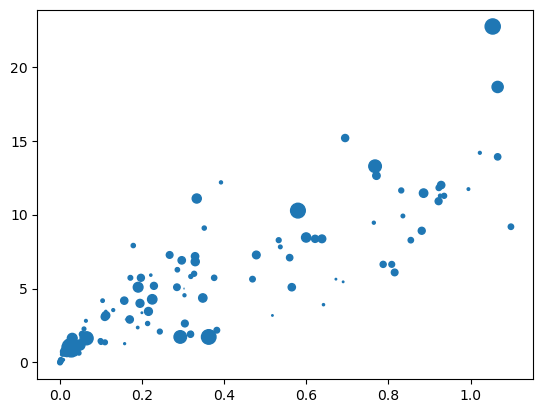

In [51]:
common_columns = set(start_end_difference.index).intersection(average_degree.index)

difference_list = [abs(start_end_difference[col]) for col in common_columns]
average_degree_list = [average_degree[col] for col in common_columns]
average_strength_list = [average_strength[col] for col in common_columns]

plt.scatter(average_strength_list, average_degree_list, s=np.array(difference_list) * 100)
# plt.scatter(trimmed_degree_df[col], year_by_year_difference[col].abs(), s=trimmed_strength_df[col] * 100)
